In [0]:

from __future__ import absolute_import, division, print_function, unicode_literals

import collections
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow.keras import layers
import tensorflow_datasets as tfds

import tensorflow as tf

class RecurrentNet(tf.keras.Model):

  def __init__(self, config, **kwargs):
    super(RecurrentNet, self).__init__(**kwargs)

    self.config = config

    self.batch_size = config["batch_size"]
    self.input_dim = config["input_dim"]
    self.units = config["units"]
    self.output_size = config["output_size"]

    self.lstm_layer = tf.keras.layers.LSTM(self.units, input_shape=(None, self.input_dim))
    self.batch_norm = layers.BatchNormalization()
    self.classifier = layers.Dense(self.output_size, activation='softmax')


  def call(self, inputs):
    x = self.lstm_layer(inputs)
    x = self.batch_norm(x)
    return self.classifier(x)

In [0]:
# odd even model
from __future__ import absolute_import, division, print_function, unicode_literals

import collections
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow.keras import layers
import tensorflow_datasets as tfds

import tensorflow as tf

class OddOrEvenNet(tf.keras.Model):

  def __init__(self, config, **kwargs):
    super(OddOrEvenNet, self).__init__(**kwargs)

    self.config = config

    # takes in 10 possible numbers and spits out 2 (either 0 or 1)
    self.odd_or_even = layers.Dense(2, activation='sigmoid', input_shape=(10,))


  def call(self, inputs):
    x = self.odd_or_even(inputs)
    return x


In [33]:
from __future__ import absolute_import, division, print_function, unicode_literals

import collections
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow.keras import layers
import tensorflow_datasets as tfds

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# convert y_train and y_test (number labels) to even or odd
# odd is 1 even is 0
y_train = y_train % 2
y_test = y_test % 2

batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28


units = 64
output_size = 10  # labels are from 0 to 9

config = {'batch_size': batch_size, 'input_dim': input_dim, 'units': units,
    'output_size': output_size}

rnn_model = RecurrentNet(config=config)
odd_even_model = OddOrEvenNet(config=config)

BigModel = tf.keras.Sequential()
BigModel.add(rnn_model)
BigModel.add(odd_even_model)

BigModel.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

BigModel.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=batch_size,
          epochs=5)  # starts training

BigModel.summary()

test_loss, test_acc = BigModel.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

# Evaluate model
predictions = BigModel.predict(x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 39s 652us/sample - loss: 0.7049 - acc: 0.5055 - val_loss: 0.7034 - val_acc: 0.9401
Epoch 2/5
60000/60000 [==============================] - 37s 623us/sample - loss: 0.7049 - acc: 0.5083 - val_loss: 0.7034 - val_acc: 0.6888
Epoch 3/5
60000/60000 [==============================] - 37s 625us/sample - loss: 0.7049 - acc: 0.4966 - val_loss: 0.7034 - val_acc: 0.0340
Epoch 4/5
60000/60000 [==============================] - 38s 626us/sample - loss: 0.7049 - acc: 0.5041 - val_loss: 0.7034 - val_acc: 0.0058
Epoch 5/5
60000/60000 [==============================] - 38s 629us/sample - loss: 0.7049 - acc: 0.4989 - val_loss: 0.7034 - val_acc: 0.0147
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
recurrent_net_9 (RecurrentNe multiple                  24714     
______________________________

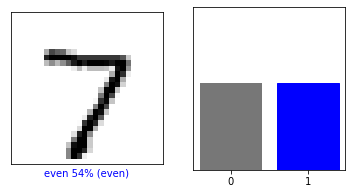

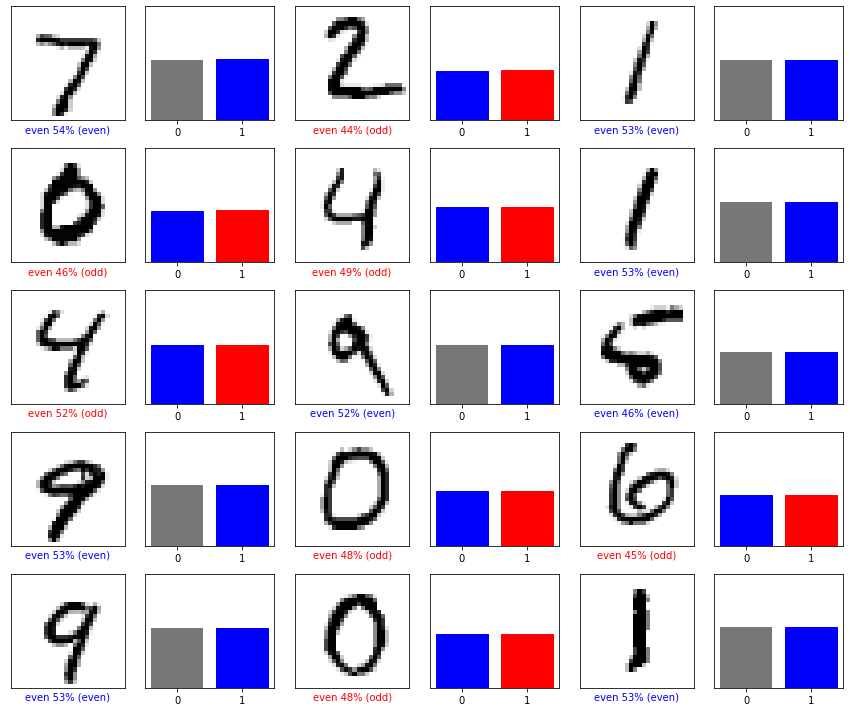

In [32]:
# testing functions
class_names = ["odd", "even"]

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()